In [61]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np

In [114]:
plotdata = pd.DataFrame({
    "dt1":[11, 21, 31, 41, 51, 61, 71, 81],
    "dt2":[0,  22,  0, 42,  0,  0,  0, 82],
    "dt3":[0,  23,  0, 43,  0,  0,  0, 83],
    "dt4":[0,   0,  0, 44,  0,  0,  0, 84],
    }, 
    index=["1999-05-01", "1999-05-02", "1999-05-03", "1999-05-04", "1999-05-05","1999-05-06", "1999-05-07", "1999-05-08"]
)


In [115]:
plotdata

,dt1,dt2,dt3,dt4
1999-05-01,11,0,0,0
1999-05-02,21,22,23,0
1999-05-03,31,0,0,0
1999-05-04,41,42,43,44
1999-05-05,51,0,0,0
1999-05-06,61,0,0,0
1999-05-07,71,0,0,0
1999-05-08,81,82,83,84


Text(0, 0.5, 'Downtime minutes')

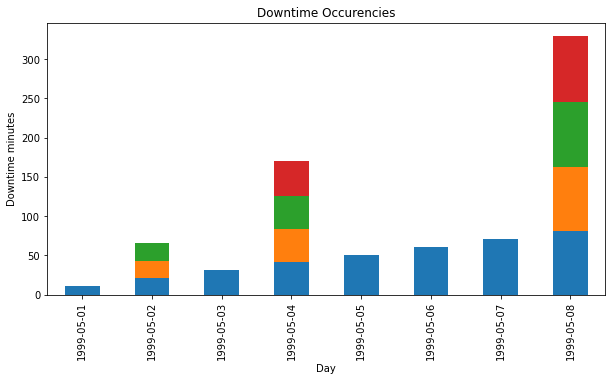

In [116]:
plotdata.plot(kind="bar",stacked=True, legend=None,figsize=(10, 5))
plt.title("Downtime Occurencies")
plt.xlabel("Day")
plt.ylabel("Downtime minutes")

In [154]:
dtds = pd.DataFrame([
    ['1999-05-01',11],
    ['1999-05-02',21],
    ['1999-05-02',22],
    ['1999-05-02',23],
    ['1999-05-03',31],
    ['1999-05-04',41],
    ['1999-05-04',42],
    ['1999-05-04',43],
    ['1999-05-04',44],
    ['1999-05-05',51],
    ['1999-05-06',61],
    ['1999-05-07',71],
    ['1999-05-08',81],
    ['1999-05-08',82],
    ['1999-05-08',83],
    ['1999-05-08',84]],
    columns=['time','downtime'])
#dtds = dtds.set_index('time')

In [155]:
dtds

,time,downtime
0,1999-05-01,11
1,1999-05-02,21
2,1999-05-02,22
3,1999-05-02,23
4,1999-05-03,31
5,1999-05-04,41
6,1999-05-04,42
7,1999-05-04,43
8,1999-05-04,44
9,1999-05-05,51


In [157]:
# Determine max_slots
max_slots = dtds.time.value_counts().max()
slot_size = len(dtds.time.value_counts()) 

In [160]:
# Monta numero de listas correspondentes à max_slots, de tamanho correspondente ao número de dias
downtime_matrix = np.zeros([max_slots,slot_size])
day_idx=0
reg_idx=0
lista_idx=-1
last_day = dtds['time'].iloc[0,]
for day in dtds['time'].tolist():
    if (day != last_day):
        print ('mudou dia')
        lista_idx=0
        last_day = day
        day_idx+=1
    else:
        print ('mesmo dia')
        lista_idx+=1
    downtime_matrix[lista_idx,day_idx]=dtds.downtime.iloc[reg_idx,]
    reg_idx+=1

mesmo dia
mudou dia
mesmo dia
mesmo dia
mudou dia
mudou dia
mesmo dia
mesmo dia
mesmo dia
mudou dia
mudou dia
mudou dia
mudou dia
mesmo dia
mesmo dia
mesmo dia


In [181]:
downtime_matrix.T

array([[11.,  0.,  0.,  0.],
       [21., 22., 23.,  0.],
       [31.,  0.,  0.,  0.],
       [41., 42., 43., 44.],
       [51.,  0.,  0.,  0.],
       [61.,  0.,  0.,  0.],
       [71.,  0.,  0.,  0.],
       [81., 82., 83., 84.]])

In [182]:
downtimedf = pd.DataFrame (downtime_matrix.T)

In [185]:
dtds.time.value_counts().sort_index().index

Index(['1999-05-01', '1999-05-02', '1999-05-03', '1999-05-04', '1999-05-05',
       '1999-05-06', '1999-05-07', '1999-05-08'],
      dtype='object')

In [186]:
downtimedf['day'] = dtds.time.value_counts().sort_index().index

In [187]:
downtimedf

,0,1,2,3,day
0,11.0,0.0,0.0,0.0,1999-05-01
1,21.0,22.0,23.0,0.0,1999-05-02
2,31.0,0.0,0.0,0.0,1999-05-03
3,41.0,42.0,43.0,44.0,1999-05-04
4,51.0,0.0,0.0,0.0,1999-05-05
5,61.0,0.0,0.0,0.0,1999-05-06
6,71.0,0.0,0.0,0.0,1999-05-07
7,81.0,82.0,83.0,84.0,1999-05-08


In [189]:
downtimedf = downtimedf.set_index('day')

In [190]:
downtimedf

,0,1,2,3
day,,,,
1999-05-01,11.0,0.0,0.0,0.0
1999-05-02,21.0,22.0,23.0,0.0
1999-05-03,31.0,0.0,0.0,0.0
1999-05-04,41.0,42.0,43.0,44.0
1999-05-05,51.0,0.0,0.0,0.0
1999-05-06,61.0,0.0,0.0,0.0
1999-05-07,71.0,0.0,0.0,0.0
1999-05-08,81.0,82.0,83.0,84.0


Text(0, 0.5, 'Downtime minutes')

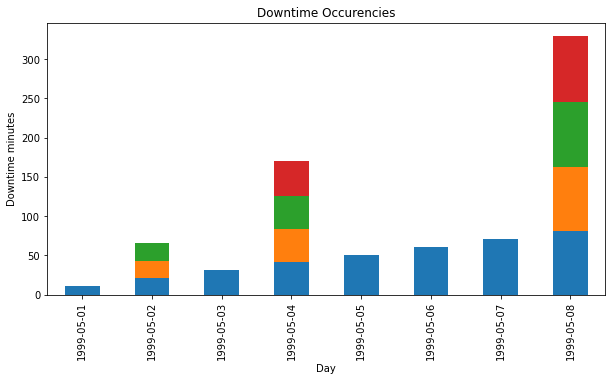

In [191]:
downtimedf.plot(kind="bar",stacked=True, legend=None,figsize=(10, 5))
plt.title("Downtime Occurencies")
plt.xlabel("Day")
plt.ylabel("Downtime minutes")